# Modelo 3: Clustering de perfiles de jugadoras

## Librerias necesarias

In [66]:
# Librerias de sistema
import os
from dotenv import load_dotenv

# Procesamiento de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
# Entrenamiento y evaluacion de modelos
import pycaret.clustering as pycc
import pycaret.utils as pycu
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
load_dotenv()
ignore_features = ['Nombre', 'Temporada', 'Equipo', 'Minutos']

### Cargar dataset en un DataFrame de Pandas

In [3]:
df = pd.read_csv(os.getenv("TRANSFORM_DATA_PATH"), sep=";")
df.head(5)

,Nombre,Temporada,Equipo,Partidos,Minutos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,...,Rebotes,Asistencias,Robos,Perdidas,Tapones,Tapones Recibidos,Mates,Faltas Cometidas,Faltas Recibidas,Valoracion
0,"PARRA, FAUSTINE LAURE CLEMENCE",2021,SPAR GIRONA,3.0,9.97,3.33,0.67,1.00,0.67,0.67,...,1.67,0.67,0.67,1.00,0.00,0.00,0.0,1.33,0.00,2.67
1,"NAVARRO LLORCA, CANDIDA",2009,HONDARRIBIA - IRÚN,19.0,9.96,2.32,0.95,2.21,0.43,0.00,...,1.42,0.37,0.11,0.47,0.11,0.00,0.0,1.32,0.63,1.68
2,"CORRALES BOHOYO, ELENA",2017,NISSAN AL-QÁZERES EXTREMADURA,26.0,9.95,1.46,0.35,1.15,0.30,0.15,...,0.50,0.46,0.38,0.69,0.00,0.12,0.0,0.81,0.35,0.38
3,"HERNANDEZ ORTIZ, ZOE",2019,MANN-FILTER CASABLANCA,19.0,9.95,2.79,0.32,0.63,0.50,0.68,...,1.11,0.37,0.47,0.47,0.05,0.11,0.0,0.95,0.26,2.68
4,"MILOGLAV, CARMEN",2016,PERFUMERIAS AVENIDA,11.0,9.94,1.27,0.36,0.55,0.67,0.18,...,0.91,0.55,0.64,1.73,0.09,0.00,0.0,1.55,0.18,-1.18


In [4]:
print(len(df.columns))
df.columns

27


Index(['Nombre', 'Temporada', 'Equipo', 'Partidos', 'Minutos', 'Puntos',
       'T2 Anotados', 'T2 Lanzados', '% T2', 'T3 Anotados', 'T3 Lanzados',
       '% T3', 'T1 Anotados', 'T1 Lanzados', '% T1', 'Reb_Ofensivos',
       'Reb_Defensivos', 'Rebotes', 'Asistencias', 'Robos', 'Perdidas',
       'Tapones', 'Tapones Recibidos', 'Mates', 'Faltas Cometidas',
       'Faltas Recibidas', 'Valoracion'],
      dtype='object')

In [5]:
# dataset sin columnas extra
cols = df.drop(columns=ignore_features).columns
print(len(cols))
cols

23


Index(['Partidos', 'Puntos', 'T2 Anotados', 'T2 Lanzados', '% T2',
       'T3 Anotados', 'T3 Lanzados', '% T3', 'T1 Anotados', 'T1 Lanzados',
       '% T1', 'Reb_Ofensivos', 'Reb_Defensivos', 'Rebotes', 'Asistencias',
       'Robos', 'Perdidas', 'Tapones', 'Tapones Recibidos', 'Mates',
       'Faltas Cometidas', 'Faltas Recibidas', 'Valoracion'],
      dtype='object')

### Preparar el pipeline y acceder a las métricas con pull

In [6]:
s = pycc.setup(df, 
          ignore_features=ignore_features,
          normalize=True,
          session_id=123,
          experiment_name="Clusterizacion de Jugadoras",
          use_gpu=True
        )

,Description,Value
0,Session id,123
1,Original data shape,"(5445, 27)"
2,Transformed data shape,"(5445, 23)"
3,Ignore features,4
4,Numeric features,23
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


### Obtener catalogo de modelos de clustering

In [7]:
catalog = pycc.models()
catalog

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


### Ejecutar cada modelo y evaluar

In [8]:
results = []

for m in catalog.index:
    # Entrenamos con 4 clusters
    mdl   = pycc.create_model(m, num_clusters=4, verbose=False)
    grid  = pycc.pull()                      # última salida de create_model
    grid['Model_ID'] = m                # para saber a qué modelo pertenece
    results.append(grid)

In [9]:
scores = pd.concat(results, ignore_index=True).sort_values('Silhouette', ascending=False)
scores

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness,Model_ID
3,0.6195,17.8869,0.3424,0,0,0,sc
0,0.2190,2027.9884,1.4786,0,0,0,kmeans
2,0.1989,75.2807,1.3186,0,0,0,meanshift
7,0.1946,1716.0641,1.6789,0,0,0,birch
4,0.1840,1747.5114,1.7409,0,0,0,hclust
5,0.0698,127.4786,0.7300,0,0,0,dbscan
1,0.0483,76.7332,1.5912,0,0,0,ap
6,-0.3308,24.2652,0.9269,0,0,0,optics


In [10]:
best = scores.iloc[0]['Model_ID']
best_model   = pycc.create_model(best, num_clusters=4)
clustered_df = pycc.assign_model(best_model)
pycc.plot_model(best_model, plot='cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6195,17.8869,0.3424,0,0,0


In [11]:
best_model   = pycc.create_model('kmeans', num_clusters=4)
clustered_df = pycc.assign_model(best_model)
pycc.plot_model(best_model, plot='cluster')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2190,2027.9884,1.4786,0,0,0


En este caso es preferible usar el modelo Kmeans debido a la necesidad de tener cuatro clusters bien diferenciados de perfiles de jugadoras.

- Spectral Clustering en este caso falla ya que genera un cluster muy grande y tres mas pequeños muy aislados.

- K-Means fuerza a repartir los datos en cuatro centroides bien separados, maximiza la varianza “entre” grupos, produce tamaños más equilibrados y es ya un estándar en analítica de rendimiento de jugadoras. 


### Limitaciones prácticas de Spectral Clustering
#### Desequilibrio de tamaños
- SC intenta minimizar cortes normalizados y, en datasets con un grupo grande y otros pequeños, “absorbe” los puntos dispersos en un gran clúster y aísla pocos enanos; el resultado fracasa cuando los tamaños son distintos
- La propia documentación de scikit-learn avisa de que SC funciona mejor con “pocos clústeres y tamaños parejos”

#### Métricas internas que confunden
- Micro-clústeres densos pueden disparar el Silhouette global, dando la falsa impresión de calidad aunque la separación global sea pobre
- El Calinski-Harabasz de SC se desploma porque la varianza “entre” clústeres casi no crece cuando tres de ellos contienen muy pocas jugadoras; por eso tu ranking mostró CH ≈ 18 frente a > 2 000 en K-Means.

#### Sensibilidad a la escala y al grafo
- SC depende de cómo construyas la matriz de afinidad; cambiar gamma o n_neighbors puede alterar totalmente la partición y volverla poco reproducible, algo documentado como “limitación fundamental” de la técnica

#### Coste y complejidad
- El cálculo de autovectores y la sintonía del grafo hacen que SC sea más lento y difícil de explicar a analistas deportivos sin background matemático, mientras que K-Means es lineal y conocido.

### Fortalezas de K-Means cuando fijas k = 4
#### Varianza global (Calinski-Harabasz)
- K-Means maximiza la relación “entre-grupos / intra-grupo”; CH es alto cuando los centroides quedan bien separados y los clústeres son compactos

#### Alineado con supuestos de tamaño parecido
- El propio modelo asume clústeres de tamaño similar, de modo que la asignación al centro más cercano sea válida —justo lo que buscas para definir cuatro perfiles útiles

#### Interpretabilidad y difusión
- Centroides y distancias euclidianas son intuitivos; los perfiles pueden describirse con medias de puntos, rebotes, etc., y se visualizan en dos clics con gráficas radar o PCA.

#### Uso consolidado en baloncesto
- La literatura divulgativa y profesional aplica K-Means para segmentar jugadores NBA por estilo de juego, lo que facilita trasladar la metodología a la LF Endesa sin fricciones

#### Robustez operacional
- Ejecutándolo con n_init alto y varias semillas obtienes resultados estables y reproducibles, algo crítico para informes técnicos y scouting.

## Usar Kmeans

In [12]:
s  = pycc.setup(df, 
                ignore_features=ignore_features,
                normalize=True,
                session_id=123,
                experiment_name="Clusterizacion de Jugadoras",
                use_gpu=True)

k4 = pycc.create_model('kmeans', num_clusters=4, n_init=50)   # robust init
df_k = pycc.assign_model(k4)

,Description,Value
0,Session id,123
1,Original data shape,"(5445, 27)"
2,Transformed data shape,"(5445, 23)"
3,Ignore features,4
4,Numeric features,23
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2196,2028.2547,1.4760,0,0,0


In [13]:
pycc.evaluate_model(k4)
pycc.plot_model(k4, plot='cluster')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
X = s.get_config('X')
labels = k4.labels_
print("CH:", calinski_harabasz_score(X, labels))
print("Silhouette:", silhouette_score(X, labels))

CH: 2573.9494799757376
Silhouette: 0.20014168


In [15]:
profile = (df_k.groupby('Cluster')
                  .agg(['mean','std'])
                  .round(2))
profile

Partidos       Puntos       T2 Anotados       T2 Lanzados        \
                mean   std   mean   std        mean   std        mean   std   
Cluster                                                                       
Cluster 0   5.360000  5.55   0.58  0.77        0.16  0.28        0.51  0.69   
Cluster 1  22.750000  6.45   9.45  2.88        2.20  0.95        4.98  1.88   
Cluster 2  19.559999  7.65   3.94  1.77        1.14  0.72        2.68  1.50   
Cluster 3  20.969999  7.16  11.89  3.71        4.36  1.30        8.82  2.41   

           % T2        ... Tapones Recibidos       Mates        \
           mean   std  ...              mean   std  mean   std   
Cluster                ...                                       
Cluster 0  0.18  0.27  ...              0.03  0.11   0.0  0.02   
Cluster 1  0.44  0.08  ...              0.21  0.14   0.0  0.01   
Cluster 2  0.42  0.12  ...              0.12  0.13   0.0  0.01   
Cluster 3  0.50  0.07  ...              0.32  0.20   0.0  0.02   

          Faltas Cometidas       Faltas Recibidas       Valoracion        
                      mean   std             mean   std       mean   std  
Cluster                                                                   
Cluster 0             0.44  0.56             0.19  0.34       0.03  1.18  
Cluster 1             2.09  0.63             2.24  0.86       8.63  3.27  
Cluster 2             1.61  0.68             1.05  0.59       3.10  2.22  
Cluster 3             2.60  0.62             3.12  1.13      13.07  4.50  

[4 rows x 46 columns]

In [16]:
mean_table = (
    df_k.groupby('Cluster')
        .mean(numeric_only=True)      # medias de todos los KPIs
        .round(2)
)
overall   = df_k.mean(numeric_only=True)
z_scores  = ((mean_table - overall) /
             df_k.std(numeric_only=True)).round(2)

In [17]:
radar = z_scores.reset_index().melt(id_vars='Cluster')
fig   = px.line_polar(radar, r='value', theta='variable',
                    color='Cluster', line_close=True)
fig.update_layout(width=1200, height=600)
fig.show()

# Asingación de cluster a un perfil de jugadora
## Cluster 0 (azul)
Perfil de jugadoras <b>INTERIORES DEFENSIVAS</b>. 

## Cluster 1 (rojo)
Perfil de jugadoras <b>ANOTADORAS</b> con mas importancia implicadas directamente en el partido <b>BASE</b>.

## Cluster 2 (verde)
Perfil de jugadoras <b>EXTERIIORES DE ROTACION</b>, solidas en general en todo, por lo general despuntan pero no son decisivas.

## Cluster 3 (morado)
Perfil de jugadoras <b>INTERIORES DOMINANTES</b> ya que al ser mas grandes cogen mas rebotes y tiran mas de 1 y 2.

In [18]:
# exportar datos del entrenamiento
clustered_df.to_csv('DATA/trained_data.csv', sep=';', index=False)

# Testing con dataset dummy

In [57]:
# expected columns
expected = list(s.get_config('X').columns)
print(s.get_config('X').dtypes.unique(), expected) 

[dtype('float32')] ['Partidos', 'Puntos', 'T2 Anotados', 'T2 Lanzados', '% T2', 'T3 Anotados', 'T3 Lanzados', '% T3', 'T1 Anotados', 'T1 Lanzados', '% T1', 'Reb_Ofensivos', 'Reb_Defensivos', 'Rebotes', 'Asistencias', 'Robos', 'Perdidas', 'Tapones', 'Tapones Recibidos', 'Mates', 'Faltas Cometidas', 'Faltas Recibidas', 'Valoracion']


In [ ]:
df_dummy = pd.read_csv('DATA/testing_dataset.csv',sep=';')
num_cols  = df_dummy.select_dtypes(include='number').columns    # sólo números  :contentReference[oaicite:2]{index=2}
df_dummy[num_cols] = df_dummy[num_cols].astype(np.float32)
df_dummy['Unnamed: 0'] = df_dummy['Unnamed: 0'].astype(np.int64)
df_dummy.dtypes

Unnamed: 0             int64
Nombre                object
Equipo                object
Partidos             float32
Puntos               float32
T2 Anotados          float32
T2 Lanzados          float32
% T2                 float32
T3 Anotados          float32
T3 Lanzados          float32
% T3                 float32
T1 Anotados          float32
T1 Lanzados          float32
% T1                 float32
Reb_Ofensivos        float32
Reb_Defensivos       float32
Rebotes              float32
Asistencias          float32
Robos                float32
Perdidas             float32
Tapones              float32
Tapones Recibidos    float32
Mates                float32
Faltas Cometidas     float32
Faltas Recibidas     float32
Valoracion           float32
dtype: object

In [91]:
print(len(df_dummy.columns))
df_dummy.columns

26


Index(['Unnamed: 0', 'Nombre', 'Equipo', 'Partidos', 'Puntos', 'T2 Anotados',
       'T2 Lanzados', '% T2', 'T3 Anotados', 'T3 Lanzados', '% T3',
       'T1 Anotados', 'T1 Lanzados', '% T1', 'Reb_Ofensivos', 'Reb_Defensivos',
       'Rebotes', 'Asistencias', 'Robos', 'Perdidas', 'Tapones',
       'Tapones Recibidos', 'Mates', 'Faltas Cometidas', 'Faltas Recibidas',
       'Valoracion'],
      dtype='object')

In [92]:
df_predict = df_dummy.copy()
df_predict = df_predict.drop(columns=['Nombre','Equipo'])
df_predict

,Unnamed: 0,Partidos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,% T3,T1 Anotados,...,Rebotes,Asistencias,Robos,Perdidas,Tapones,Tapones Recibidos,Mates,Faltas Cometidas,Faltas Recibidas,Valoracion
0,0,1.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.0,1.00,0.00,-3.00
1,1,27.0,7.89,3.30,7.33,0.45,0.00,0.11,0.00,1.30,...,4.26,1.41,0.70,1.30,0.33,0.19,0.0,2.07,3.07,8.52
2,2,7.0,2.86,0.86,2.29,0.38,0.14,0.57,0.25,0.71,...,2.86,0.43,0.00,0.43,0.14,0.00,0.0,1.71,1.71,3.71
3,3,25.0,5.12,0.60,1.28,0.47,1.24,2.20,0.56,0.20,...,1.20,0.72,0.36,0.36,0.00,0.00,0.0,0.80,0.76,5.32
4,4,7.0,6.00,2.14,5.71,0.38,0.43,1.29,0.33,0.43,...,5.00,0.43,0.57,0.71,0.14,0.14,0.0,2.00,0.71,5.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,9.0,6.33,1.22,2.89,0.42,1.22,3.89,0.31,0.22,...,2.56,0.78,0.22,1.44,0.11,0.11,0.0,0.44,0.33,4.11
231,231,30.0,8.10,3.73,7.00,0.53,0.00,0.07,0.00,0.63,...,4.23,0.63,0.57,1.43,0.20,0.17,0.0,1.67,1.53,8.30
232,232,29.0,12.72,2.93,6.41,0.46,1.93,5.83,0.33,1.07,...,3.55,1.79,0.90,1.41,0.03,0.34,0.0,2.07,1.69,9.31
233,233,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [94]:
kmeans_predictions = pycc.predict_model(model = k4, data = df_dummy)
kmeans_predictions

,Partidos,Puntos,T2 Anotados,T2 Lanzados,% T2,T3 Anotados,T3 Lanzados,% T3,T1 Anotados,T1 Lanzados,...,Asistencias,Robos,Perdidas,Tapones,Tapones Recibidos,Mates,Faltas Cometidas,Faltas Recibidas,Valoracion,Cluster
0,-1.762074,-1.270990,-1.091434,-0.905185,-2.053411,-0.814761,-0.937651,-1.122330,-1.013772,-1.072637,...,-1.010815,-1.202668,-0.369858,-0.618517,-0.920584,-0.11591,-0.695678,-1.215022,-1.588255,Cluster 0
1,0.995269,0.365952,0.891784,1.021474,0.317785,-0.814761,-0.868882,-1.122330,0.215142,1.018369,...,0.445030,-0.105024,-0.056110,0.565354,0.169818,-0.11591,0.413718,1.179064,0.503866,Cluster 3
2,-1.125764,-0.677624,-0.574595,-0.512548,-0.051067,-0.574013,-0.581300,0.165028,-0.342596,-0.358983,...,-0.566834,-1.202668,-0.965980,-0.116269,-0.920584,-0.11591,0.040464,0.118492,-0.369668,Cluster 2
3,0.783166,-0.208741,-0.730849,-0.819961,0.423172,1.317582,0.437741,1.761351,-0.824708,-0.901360,...,-0.267405,-0.638165,-1.039188,-0.618517,-0.920584,-0.11591,-0.903042,-0.622349,-0.077279,Cluster 2
4,-1.125764,-0.026167,0.194653,0.528395,-0.051067,-0.075320,-0.131171,0.576982,-0.607285,-0.458895,...,-0.566834,-0.308872,-0.673148,-0.116269,-0.117130,-0.11591,0.341141,-0.661341,-0.082727,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,-0.913661,0.042298,-0.358244,-0.329926,0.159705,1.283190,1.494292,0.473993,-0.805802,-0.915633,...,-0.205454,-0.857694,0.090306,-0.223893,-0.289299,-0.11591,-1.276297,-0.957677,-0.297024,Cluster 2
231,1.313424,0.409521,1.150203,0.921032,0.739331,-0.814761,-0.893889,-1.122330,-0.418221,-0.237662,...,-0.360331,-0.308872,0.079848,0.098980,0.055039,-0.11591,-0.001009,-0.021878,0.463912,Cluster 2
232,1.207373,1.368034,0.669423,0.741454,0.370479,2.504128,2.707137,0.576982,-0.002281,0.062073,...,0.837385,0.208588,0.058931,-0.510892,1.030663,-0.11591,0.413718,0.102895,0.647336,Cluster 1
233,-1.762074,-1.270990,-1.091434,-1.209554,-2.053411,-0.814761,-0.937651,-1.122330,-1.013772,-1.072637,...,-1.010815,-1.202668,-1.415686,-0.618517,-0.920584,-0.11591,-1.732498,-1.215022,-1.043432,Cluster 0


In [99]:
pca = PCA(n_components=2, random_state=0)
kmeans_predictions[['PC1','PC2']] = pca.fit_transform(X)

In [ ]:
cluster_numeric = (
    kmeans_predictions['Cluster']
        .str.extract(r'(\d+)')
        .astype(int)
        .squeeze()
)

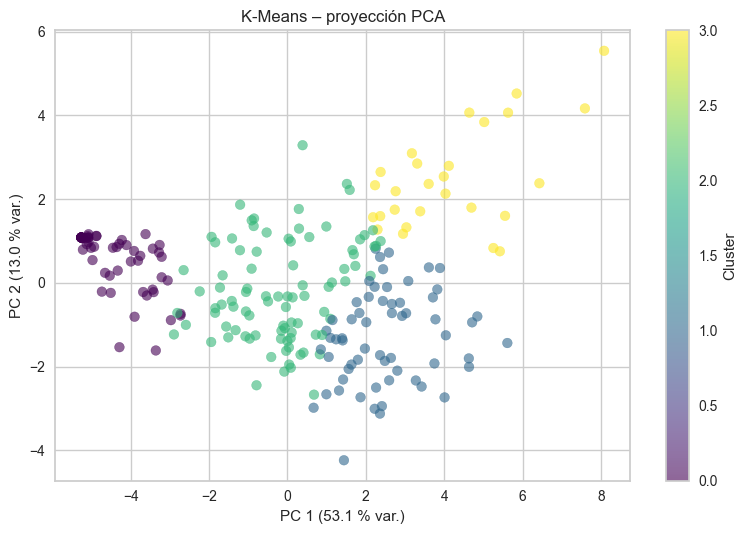

In [ ]:
plt.scatter(
    kmeans_predictions['PC1'],
    kmeans_predictions['PC2'],
    c=cluster_numeric, cmap='viridis', alpha=0.6
)
plt.xlabel('PC 1 (%.1f %% var.)' % (pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC 2 (%.1f %% var.)' % (pca.explained_variance_ratio_[1]*100))
plt.title('K-Means - proyección PCA')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# Guardar modelo para usarlo

In [107]:
pycc.save_model(k4, 'trained_models/LFENDESA_kmeans')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Partidos', 'Puntos',
                                              'T2 Anotados', 'T2 Lanzados',
                                              '% T2', 'T3 Anotados',
                                              'T3 Lanzados', '% T3',
                                              'T1 Anotados', 'T1 Lanzados',
                                              '% T1', 'Reb_Ofensivos',
                                              'Reb_Defensivos', 'Rebotes',
                                              'Asistencias', 'Robos', 'Perdidas',
                                              'Tapones', 'Tapones Recibidos',
                                              'Mates', 'Faltas Cometidas',
                                              'Faltas Recibidas', 'Valoracion'],
                                     transformer=SimpleImputer())),
                 ('categorical_im